In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Data/emotions_data.zip 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import glob

In [ ]:
name_list = glob.glob('/content/images/train/angry/*')

X=[]
name_label = []

for name in name_list:
  name_label.append(0)
  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(50,50))

  X.append((img))

len(X)


3993

In [ ]:
name_list = glob.glob('/content/images/train/disgust/*')
for name in name_list:
  name_label.append(1)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50,50))
  X.append((img))
len(X)


4865

In [ ]:
name_list = glob.glob('/content/images/train/fear/*')
for name in name_list:
  name_label.append(2)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50,50))
  X.append((img))
len(X)

8968

In [ ]:
name_list = glob.glob('/content/images/train/happy/*')
for name in name_list:
  name_label.append(3)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50,50))
  X.append((img))
len(X)

16132

In [ ]:
name_list = glob.glob('/content/images/train/neutral/*')
for name in name_list:
  name_label.append(4)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50,50))
  X.append((img))
len(X)

21114

In [ ]:
name_list = glob.glob('/content/images/train/sad/*')
for name in name_list:
  name_label.append(5)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50,50))
  X.append((img))
len(X)

26052

In [ ]:
name_list = glob.glob('/content/images/train/surprise/*')
for name in name_list:
  name_label.append(6)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (50,50))
  X.append((img))
len(X)

29257

In [ ]:
X = np.array(X)
y = np.array(name_label)

print(X.shape)
print(y.shape)

(29257, 50, 50)
(29257,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(23405, 50, 50) (5852, 50, 50)
(23405,) (5852,)


In [ ]:
X_train_scaled = np.array([x.ravel()/255. for x in X_train])
X_test_scaled = np.array([x.ravel()/255. for x in X_test])

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(23405, 2500)
(5852, 2500)


In [ ]:
print(y_train)

[2 5 0 ... 0 3 5]


In [ ]:
def one_hot (y,num_class):
  return np.eye(num_class)[y]

In [ ]:
y_train_onehot = one_hot(y_train, 7)
y_test_onehot = one_hot(y_test, 7)

In [ ]:
print(y_train_onehot[-1])

[0. 0. 0. 0. 0. 1. 0.]


In [ ]:
def predict(X, w):
  h = np.dot(X, w)
  softmax = np.exp(h)
  y_pred = softmax / np.sum(softmax, axis = 1, keepdims = True)
  return y_pred

def loss(X, w, y):
  y_pred = predict(X, w)
  return -np.sum(y * np.log(y_pred)) / y.shape[0]

def grad(X, w, y):
  y_pred = predict(X, w)
  delta = y_pred - y
  return np.dot(X.T, delta) / X.shape[0]

def gradient_descent(X, y, lr = 0.01, epochs = 1000):
  w = np.zeros((X.shape[1],1))
  losses = []
  for i in range(epochs):
    w = w - lr*grad(X, w, y)
    a = loss(X, w, y)
    losses.append(a)
  print(f'Loss cross entropy: {a}')
  return losses, w

Loss cross entropy: 1.7006709441181387


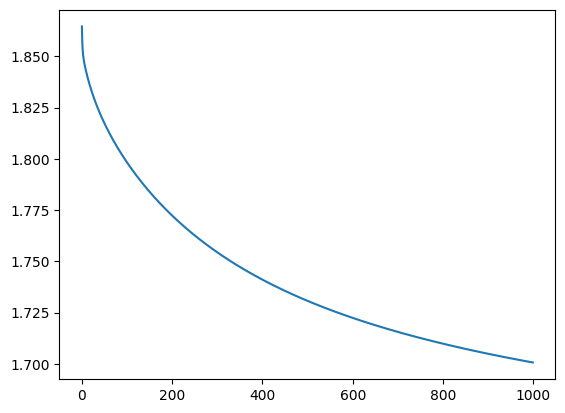

In [ ]:
l,w = gradient_descent(X_train_scaled, y_train_onehot)
plt.plot(l)

In [ ]:
def predict_classes(X,w):
  y_pred = predict(X,w)
  y_pred = np.argmax(y_pred, axis=1)
  return y_pred

In [ ]:
y_pred = predict_classes (X_test_scaled, w)

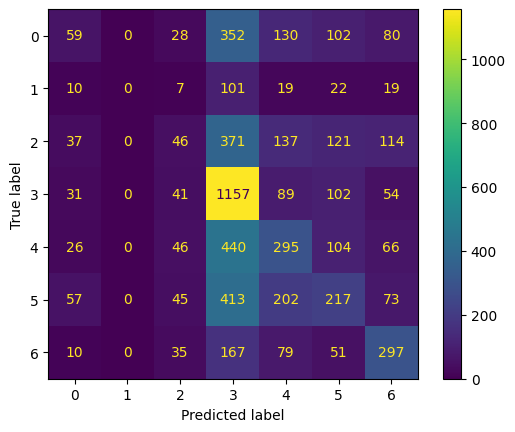

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
n_classes = cm.shape[0]
n_class = cm.shape[0] 
tp = np.zeros(n_class)
fn = np.zeros(n_class)
fp = np.zeros(n_class)
for i in range(n_class):
    tp[i] = cm[i][i]
    fn[i] = np.sum(cm[i]) - tp[i]
    fp[i] = np.sum(cm[:,i]) - tp[i]
    
accuracy = np.sum(tp) / np.sum(cm)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = (2 * recall * precision) / (precision + recall)

print(accuracy)
print(recall)
print(precision)
print(f1_score)


0.3538961038961039
[0.07856192 0.         0.05569007 0.78493894 0.30194473 0.21549156
 0.46478873]
[0.25652174        nan 0.18548387 0.38553815 0.31019979 0.30180807
 0.42247511]
[0.12028542        nan 0.08566108 0.51709497 0.3060166  0.25144844
 0.44262295]


<ipython-input-82-5c2fe140c720>:13: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / (tp + fp)


Tao ham 

In [ ]:
class multiclass:
  def __init__ (self, lr=0.01, epochs=500):
    self.lr = lr
    self.epochs = epochs
  
  def predict(self, X):
    h = np.dot(X, self.w)
    softmax = np.exp(h)
    y_pred = softmax / np.sum(softmax, axis = 1, keepdims = True)
    return y_pred

  def loss(self, X, y):
    y_pred = self.predict(X)
    return -np.sum(y * np.log(y_pred)) / y.shape[0]

  def grad(self, X, y):
    y_pred = self.predict(X)
    delta = y_pred - y
    return np.dot(X.T, delta) / X.shape[0]

  def gradient_descent(self, X, y):
    self.w = np.zeros((X.shape[1],1))
    self.losses = []
    for i in range(self.epochs):
      self.w = self.w - self.lr*self.grad(X, y)
      a = self.loss(X, y)
      self.losses.append(a)
    print(f'Loss cross entropy: {a}')

  def predict_classes(self, X):
    y_pred = self.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred

Loss cross entropy: 1.7308091152889953


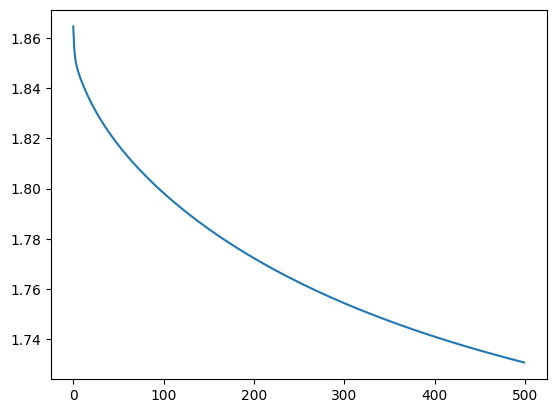

In [ ]:
model = multiclass(lr=0.01, epochs=500)
model.gradient_descent(X_train_scaled, y_train_onehot)
y_pred = predict_classes (X_test_scaled, w)

plt.plot(model.losses)

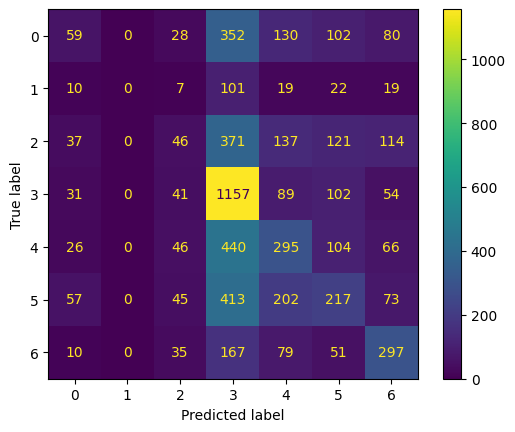

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

Them Bias

In [ ]:
ones = np.ones((X_train_scaled.shape[0], 1))
X_train_new = np.hstack((ones, X_train_scaled))
X_train_new.shape

(23405, 2501)

In [ ]:
def predict(X, w):
  h = np.dot(X, w)
  softmax = np.exp(h)
  y_pred = softmax / np.sum(softmax, axis = 1, keepdims = True)
  return y_pred

def loss(X, w, y):
  y_pred = predict(X, w)
  return -np.sum(y * np.log(y_pred)) / y.shape[0]

def grad(X, w, y):
  y_pred = predict(X, w)
  delta = y_pred - y
  return np.dot(X.T, delta) / X.shape[0]

def gradient_descent(X, y, lr = 0.01, epochs = 1000):
  w = np.zeros((X_train_new.shape[1],1))
  losses = []
  for i in range(epochs):
    w = w - lr*grad(X, w, y)
    a = loss(X, w, y)
    losses.append(a)
  print(f'Loss cross entropy: {a}')
  return losses, w

Loss cross entropy: 1.6971319737357657


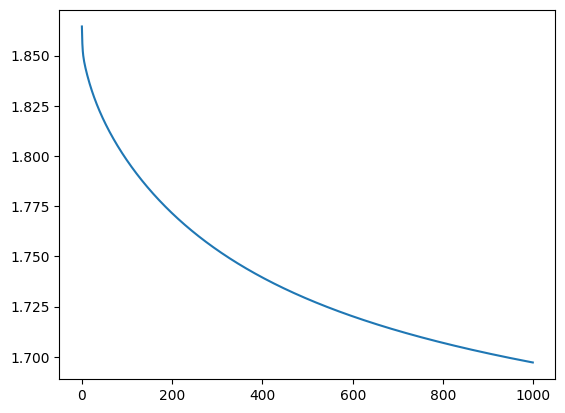

In [ ]:
l,w = gradient_descent(X_train_new,y_train_onehot)
plt.plot(l)

In [ ]:
X_test_new = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
X_test_new.shape

(5852, 2501)

In [ ]:
def predict_classes(X,w):
  y_pred = predict(X,w)
  y_pred = np.argmax(y_pred, axis=1)
  return y_pred

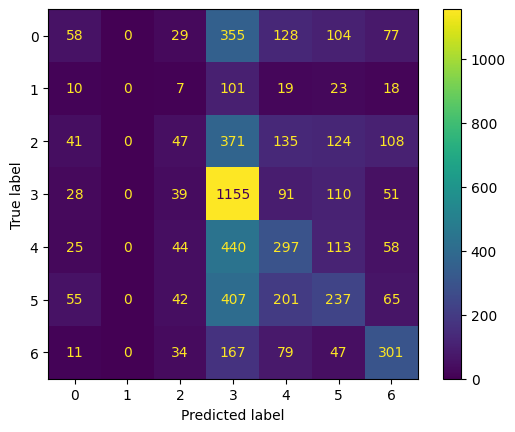

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = predict_classes (X_test_new, w)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
print(y_pred[19])

4


In [ ]:
print(y_test[19])

3


In [ ]:
n_classes = cm.shape[0]
n_class = cm.shape[0] 
tp = np.zeros(n_class)
fn = np.zeros(n_class)
fp = np.zeros(n_class)
for i in range(n_class):
  tp[i] = cm[i][i]
  fn[i] = np.sum(cm[i]) - tp[i]
  fp[i] = np.sum(cm[:,i]) - tp[i]
    
accuracy = np.sum(tp) / np.sum(cm)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = (2 * recall * precision) / (precision + recall)

print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision: ", precision)
print("f1_score: ", f1_score)


Accuracy:  0.35799726589200276
Recall:  [0.07723036 0.         0.05690073 0.78358209 0.30399181 0.23535253
 0.47104851]
Precision:  [0.25438596        nan 0.19421488 0.38551402 0.31263158 0.31266491
 0.4439528 ]
f1_score:  [0.11848825        nan 0.08801498 0.51677852 0.30825117 0.26855524
 0.45709947]


<ipython-input-95-b4e20d4968dd>:13: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / (tp + fp)
